In [1]:
import sys
sys.path.append("../../../..")
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from ntupleReaders.clue_ntuple_reader import ClueNtupleReader
from energy_resolution.sigma_over_e import plotSigmaOverMean, plotSCAsEllipse

from ml.dynamic_reduction_network import DynamicReductionNetwork
%aimport ml.regression.drn.modules
%aimport ml.regression.drn.plot
%aimport ml.regression.drn.dataset_making
from ml.regression.drn.modules import *
from ml.regression.drn.dataset_making import *
%aimport ml.regression.drn.plots.sigma_over_e
from ml.regression.drn.callbacks.sigma_over_e import SigmaOverEPlotter
%aimport ml.regression.drn.predict
from ml.regression.drn.predict.predict import Predictor



In [2]:
reader = ClueNtupleReader("v40", "cmssw", "data")
dataset = DRNDataset(reader, datasetComputationClass=RechitsTensorMaker, datasetType="full", simulation=False)

In [3]:
model = DRNModule(drn=DynamicReductionNetwork(input_dim=4,hidden_dim=20,k=10,output_dim=1,norm=torch.tensor([ 1., 1., 1., 1.])),
    loss=RatioCorrectedLoss(
        [-0.5132909 , -0.51232703,  1.01987132] # data
        #[-0.2597882 , -0.24326517,  1.01537901] # simulation
        ))

In [4]:
predictor = Predictor(model, RechitsTensorMaker)
predictor.loadDataDataset()

In [5]:
predictor.makeTrainerAndPredict("/grid_mnt/vol_home/llr/cms/cuisset/hgcal/testbeam18/clue3d-dev/src/Plotting/runs/DRN/Jun16-scan-rechits/lightning_logs/version_20/checkpoints/epoch=23-step=4656.ckpt")
h = predictor.h_2D
h

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /grid_mnt/vol_home/llr/cms/cuisset/hgcal/testbeam18/clue3d-dev/src/Plotting/runs/DRN/Jun16-scan-rechits/lightning_logs/version_20/checkpoints/epoch=23-step=4656.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from the checkpoint at /grid_mnt/vol_home/llr/cms/cuisset/hgcal/testbeam18/clue3d-dev/src/Plotting/runs/DRN/Jun16-scan-rechits/lightning_logs/version_20/checkpoints/epoch=23-step=4656.ckpt
/grid_mnt/vol_home/llr/cms/cuisset/mambaforge/envs/clustering-analysis-gpu2/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on thi

Predicting: 0it [00:00, ?it/s]

Hist(
  IntCategory([20, 30, 50, 80, 100, 120, 150, 200, 250, 300], name='beamEnergy', label='Beam energy (GeV)'),
  Regular(2000, 0, 350, name='clus3D_mainTrackster_energy_pred', label='Main trackster energy, predicetd by NN (GeV)'),
  storage=Double()) # Sum: 268536.0 (268539.0 with flow)

### Coefs for ratio
Data : [-0.5132909 , -0.51232703,  1.01987132]

sim : [-0.2597882 , -0.24326517,  1.01537901]

In [15]:
plotter = SigmaOverEPlotter(overlaySigmaOverEResults=[reader.loadSigmaOverEResults("rechits"), reader.loadSigmaOverEResults("clue3d")], interactive=True,
    beamEnergiesInTestSet=beamEnergiesForTestSet)
plotter.histogram_2D = h
plotter.sigma_mu_fits()
plotter.fitSigmaOverE()

EResolutionFitResult(S=0.22447422458992092+/-0.001405031641429644, C=0.006406097881251431+/-0.00043316211583297)

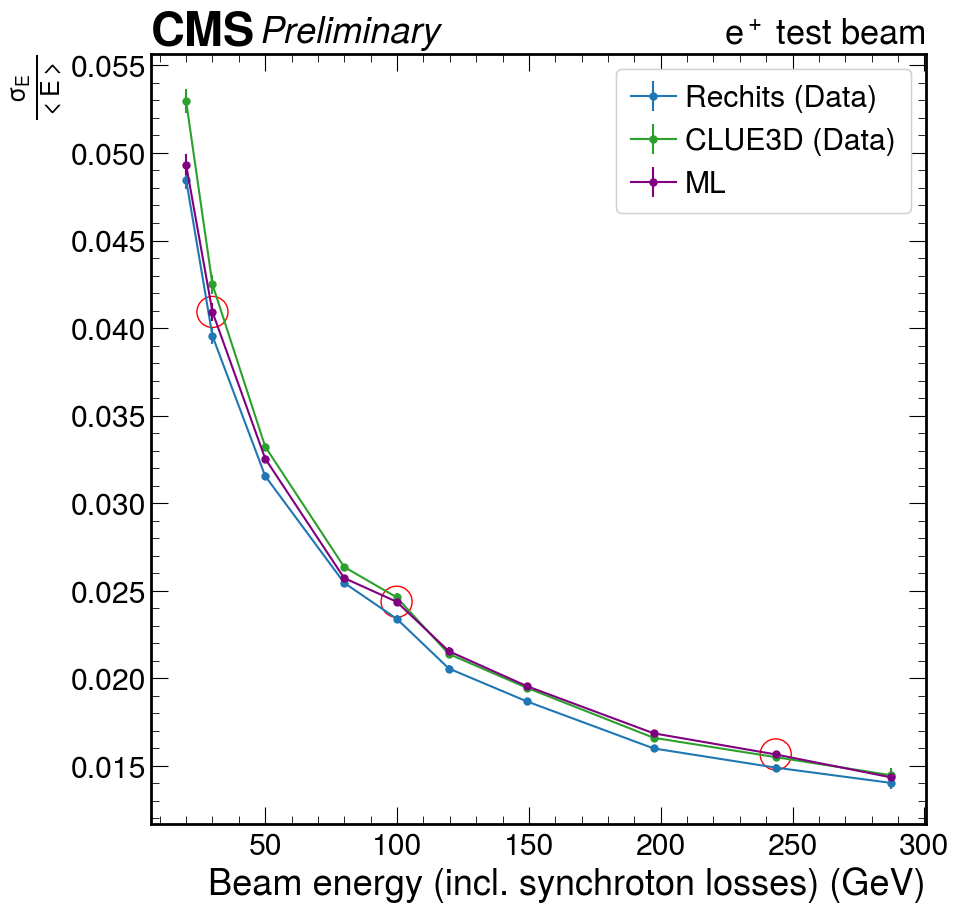

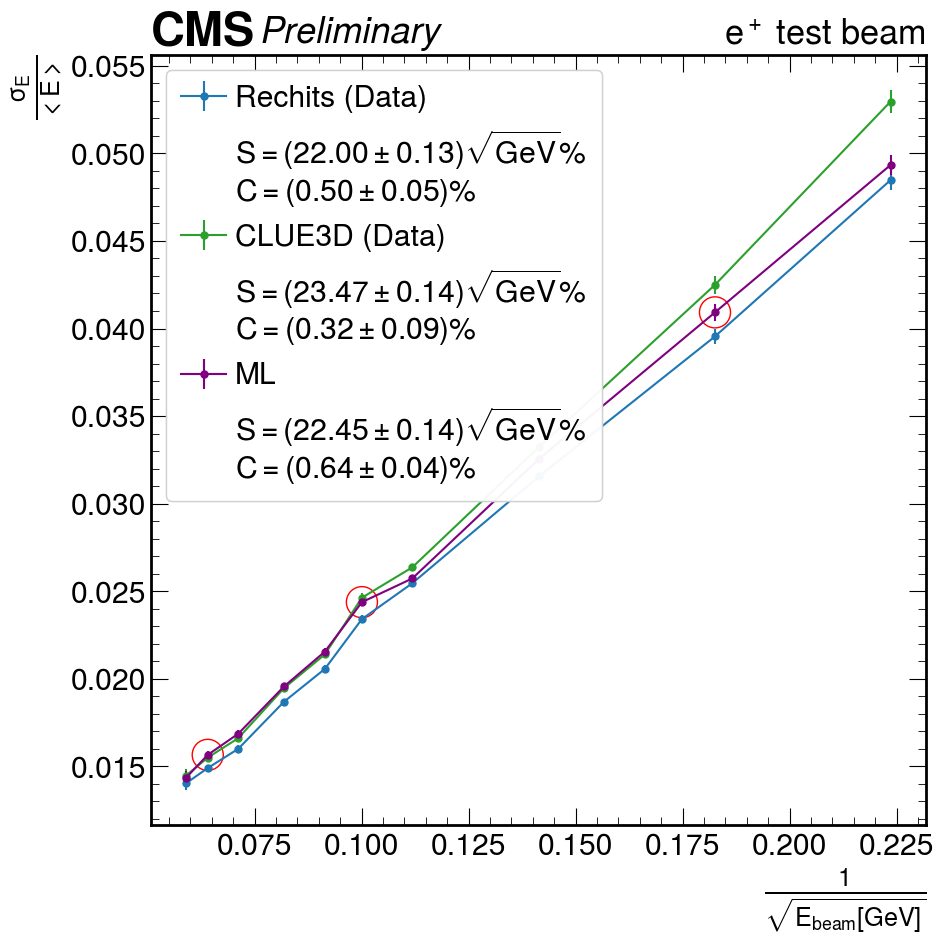

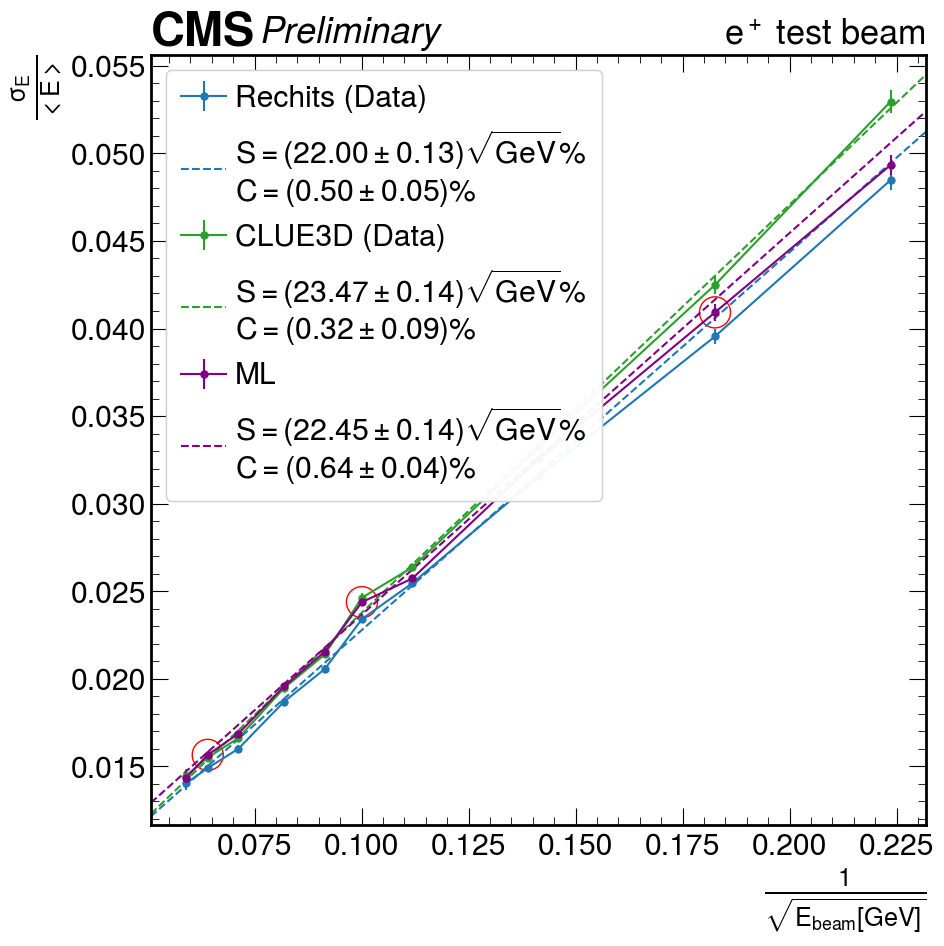

In [25]:
plotter.plotSigmaOverMean(xMode="E")
plotter.plotSigmaOverMean(xMode="1/sqrt(E)", plotFit=False)
plotter.plotSigmaOverMean(xMode="1/sqrt(E)", plotFit=True)
None

In [30]:
dp = plotter.plotElt.dataPoints
x = np.array(list(dp.keys()))
y = np.array([x.nominal_value for x in dp.values()])
x, y

(array([ 20,  30,  50,  80, 100, 120, 150, 200, 250, 300]),
 array([0.04933935, 0.04092139, 0.03254937, 0.02572709, 0.02437516,
        0.02154907, 0.01956111, 0.01686128, 0.0156565 , 0.01435219]))

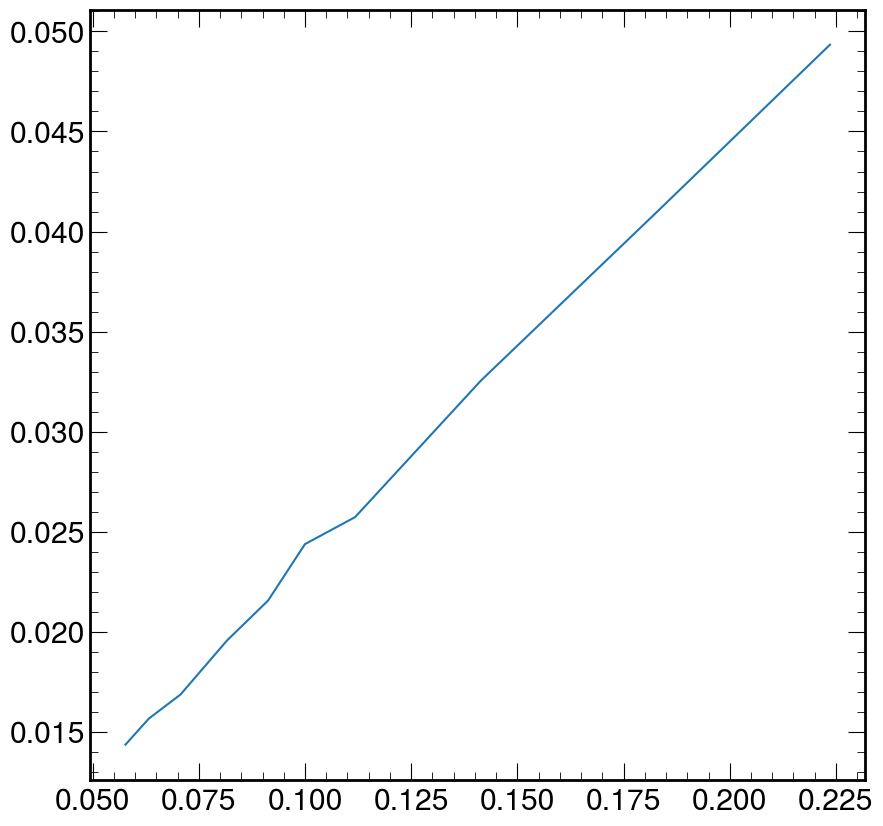

In [33]:
plt.plot(1/np.sqrt(x), y)

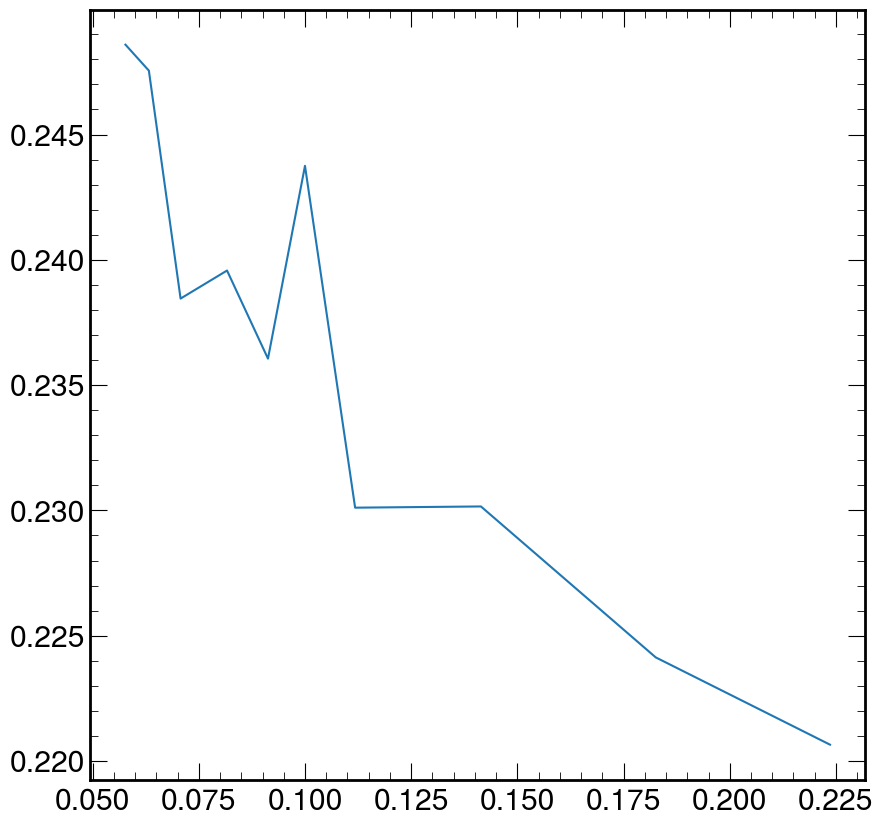

In [32]:
plt.plot(1/np.sqrt(x), y*np.sqrt(x))

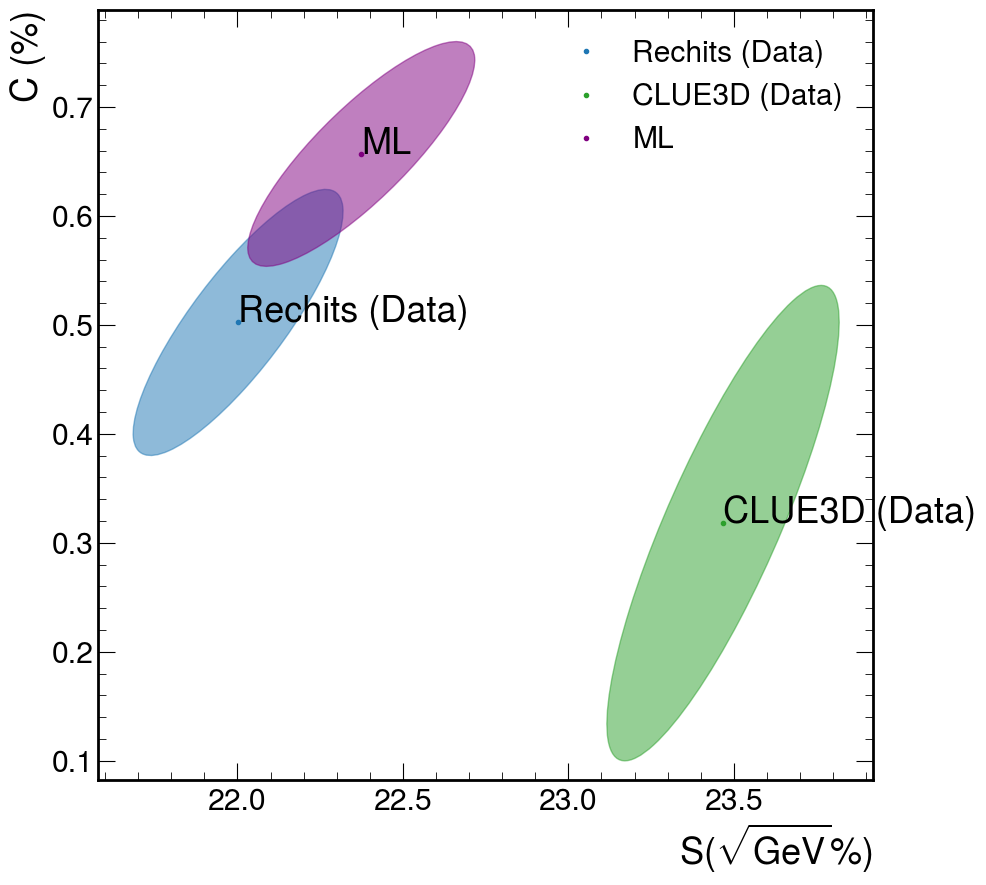

In [ ]:
plotSCAsEllipse(plotter.overlaySigmaOverEResults + [plotter.plotElt])
None